### NBA MVP Prediction Project

In [ ]:
# Imports
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Our first objective in this project is to scrape data from Basketball Reference regarding past MVP voting, player statistics, and team standings. 

To do so we will be using BeautifulSoup and Selenium

In [5]:
# Create a list of years we want to scrape data for

years = list(range(1995, 2023))

In [6]:
# Define the URL that will be used for scraping data
url_start = "https://www.basketball-reference.com/awards/awards_{}.html" #{} will be used to input the year we want to scrape

In [7]:
# Loop through the years list and add in the year to the URL

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    # write the page for each year to a file
    with open("MVP/{}.html".format(year), "w+", encoding = "utf-8") as f:
        f.write(data.text)

In [3]:
# Import BeutifulSoup for HMTL parsing

from bs4 import BeautifulSoup

In [ ]:
# Check one page

with open("MVP/1995.html", mode = 'r', encoding = 'utf-8') as f:
    page = f.read()

# View raw html
page    

# Outputs of current cell have been cleared as it was a very long output

In [10]:
# Create a soup variable that is parsing the page
soup = BeautifulSoup(page, 'html.parser')

In [11]:
# Delete the over_header as it will create an extra header row in our pandas df when we get there

soup.find('tr', class_="over_header").decompose()

In [12]:
# Find the table we want to use - in this case it has the id 'mvp'

mvp_table = soup.find(id='mvp')

In [13]:
# Read in the HTML table into pandas

mvp_1991 = pd.read_html(str(mvp_table))[0]

In [14]:
# Validate df

mvp_1991

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,David Robinson,29,SAS,73.0,901.0,1050,0.858,81,38.0,27.6,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273
1,2,Shaquille O'Neal,22,ORL,12.0,605.0,1050,0.576,79,37.0,29.3,11.4,2.7,0.9,2.4,0.583,0.000,0.533,14.0,0.230
2,3,Karl Malone,31,UTA,14.0,532.0,1050,0.507,82,38.1,26.7,10.6,3.5,1.6,1.0,0.536,0.268,0.742,13.8,0.212
3,4,Patrick Ewing,32,NYK,2.0,230.0,1050,0.219,79,37.0,23.9,11.0,2.7,0.9,2.0,0.503,0.286,0.750,9.6,0.157
4,5,Hakeem Olajuwon,32,HOU,1.0,147.0,1050,0.140,72,39.6,27.8,10.8,3.5,1.8,3.4,0.517,0.188,0.756,10.7,0.181
5,6,Charles Barkley,31,PHO,1.0,96.0,1050,0.091,68,35.0,23.0,11.1,4.1,1.6,0.7,0.486,0.338,0.748,10.6,0.214
6,7,Scottie Pippen,29,CHI,1.0,83.0,1050,0.079,79,38.2,21.4,8.1,5.2,2.9,1.1,0.480,0.345,0.716,11.8,0.188
7,8,John Stockton,32,UTA,1.0,47.0,1050,0.045,82,35.0,14.7,3.1,12.3,2.4,0.3,0.542,0.449,0.804,13.9,0.233
8,9,Gary Payton,26,SEA,0.0,34.0,1050,0.032,82,36.8,20.6,3.4,7.1,2.5,0.2,0.509,0.302,0.716,11.7,0.187
9,10,Anfernee Hardaway,23,ORL,0.0,23.0,1050,0.022,77,37.7,20.9,4.4,7.2,1.7,0.3,0.512,0.349,0.769,10.7,0.177


In [15]:
# Turn above into loop to pull the desired df for each year

dfs = []

for year in years:
    with open('MVP/{}.html'.format(year), encoding = 'utf-8') as f:
        page = f.read()
    # Instantiate soup object with HTML parser
    soup = BeautifulSoup(page, 'html.parser')
    # Remove the over header (junk title row)
    soup.find('tr', class_="over_header").decompose()
    # Find the table we are going to use for our DF
    mvp_table = soup.find(id = 'mvp')
    mvp = pd.read_html(str(mvp_table))[0]
    # Create a column that contains year info 
    mvp['Year'] = year
    # append to the dfs list that we created
    dfs.append(mvp)
    
    

In [ ]:
dfs

In [17]:
# We are curently working with a list of dfs - let's use pd.concat to bring them all into one dataframe
mvps = pd.concat(dfs)

In [18]:
# Save our new df to a csv so we can pull it in later to work with it
mvps.to_csv("mvps.csv")

In [4]:
# Import selenium webdriver to be able to automate interaction with website

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [5]:
# Specify path and instantiate browser

driver = webdriver.Chrome()

In [8]:
# Import time - we will use time to create a pause between scrolls in the next cell
import time

In [6]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [ ]:
# Specify URL that we will use to pull player stats

player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

url = player_stats_url.format(1995)

driver.get(url)
driver.execute_script("window.scrollTo(1,1000)")
time.sleep(2)

# Grab the html
html = driver.page_source
html

In [ ]:
# Iterate through years and grab player stats from the player stats page

for year in years:
    # Format our URL with each year
    url = player_stats_url.format(year)
    driver.get(url)
    # Scroll the window
    driver.execute_script("window.scrollTo(1,1000)")
    time.sleep(2)
    # Grab HTML 
    html = driver.page_source
    with open("Player Stats/{}.html".format(year), mode = 'w+', encoding = 'utf-8') as f:
        f.write(html)

In [ ]:
# Create loop to extract the player stats tables using BeautifulSoup and store them in a df

dfs = []

for year in years:
    # Open player stats file
    with open("Player Stats/{}.html".format(year), mode = 'r', encoding = 'utf-8') as f:
        page = f.read()
    #instantiate beautiful soup object
    soup = BeautifulSoup(page, "html.parser")
    # remove the recurring row that shows headers
    soup.find('tr', class_ = "thead").decompose()
    # find the table with player stats
    player_table = soup.find(id='per_game_stats')
    # use pandas to read in the table and store it as a df
    player = pd.read_html(str(player_table))[0]
    # add column for the year
    player['Year'] = year
    dfs.append(player)


In [ ]:
dfs

In [ ]:
players = pd.concat(dfs)

In [ ]:
players

In [ ]:
# Save this dataframe to a csv
players.to_csv("player_stats.csv")

### Now we will gather information about the yearly team records 

In [ ]:
# Get the URL of the page that has team records

team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [ ]:
# Run one sample - 1995
year = 1995
url_1995 = team_stats_url.format(year)

# request html from the page
data = requests.get(url_1995)

# write the html to a file
with open("Team Records/{}.html".format(year), mode = 'w+', encoding = 'utf-8') as f:
    f.write(data.text)
    
# NOTE: This will only grab team division standings - if we wanted to grab the conference standings or any other tables from 
# this page we would need to use Selenium again.


In [ ]:
# Now that we know the above works, we can convert this to a loop

for year in years:
    url = team_stats_url.format(year)
    data = requests.get(url)
    with open("Team Records/{}.html".format(year), mode = 'w+', encoding = 'utf-8') as f:
        f.write(data.text)

### We will now use Beautiful Soup to scrape necessary data

In [ ]:
# Read in the HTML files for each year and extract the necessary tables
dfs = []
for year in years:
    with open("Team Records/{}.html".format(year), mode = 'r', encoding = 'utf-8') as f:
        page = f.read()

    # Instantiate BeautifulSoup object to scrape the Eastern Conference Table 
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_='thead').decompose()
    team_records = soup.find(id='divs_standings_E')
    team = pd.read_html(str(team_records))[0]
    team['Year'] = year
    # Rename Eastern/Western Conference column to Team Name
    team['Team Name'] = team['Eastern Conference']
    del team['Eastern Conference']
    # Append to the dfs list
    dfs.append(team)

    # Instantiate BeautifulSoup object to scrape the Western Conference Table 
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_='thead').decompose()
    team_records = soup.find(id='divs_standings_W')
    team = pd.read_html(str(team_records))[0]
    team['Year'] = year
    # Rename Eastern/Western Conference column to Team Name
    team['Team Name'] = team['Western Conference']
    del team['Western Conference']
    # Append the dfs list
    dfs.append(team)

In [ ]:
# Validate dfs
dfs 

In [ ]:
# Since this is currently a list of dataframes, we will need to use pd.concat to concatenate them into one
team_records = pd.concat(dfs)

In [ ]:
# Validate
team_records

In [ ]:
# Save dataframe to a csv
team_records.to_csv('team_records.csv')

## 2. Now that we have scraped and stored the necessary data into the designated CSVs, we can start cleaning and structuring out data so that we can create a machine learning model using the data

- We have our data stored in 3 CSVs
    - mvps.csv contains data regarding the MVP's from each year and how many votes players got
    - player_stats.csv contains player's statistical data from each year
    - team_records.csv contains team records and standings data from each team each year

In [11]:
# Read in mvp voting data
mvps = pd.read_csv('mvps.csv', index_col = 'Unnamed: 0')
mvps.head().T

,0,1,2,3,4
Rank,1,2,3,4,5
Player,David Robinson,Shaquille O'Neal,Karl Malone,Patrick Ewing,Hakeem Olajuwon
Age,29,22,31,32,32
Tm,SAS,ORL,UTA,NYK,HOU
First,73.0,12.0,14.0,2.0,1.0
Pts Won,901.0,605.0,532.0,230.0,147.0
Pts Max,1050,1050,1050,1050,1050
Share,0.858,0.576,0.507,0.219,0.14
G,81,79,82,79,72
MP,38.0,37.0,38.1,37.0,39.6


In [ ]:
# Read in player stats data 
player_stats = pd.read_csv('player_stats.csv', index_col = 'Unnamed: 0')
player_stats.head().T

In [13]:
# Read in team record data 
team_records = pd.read_csv('team_records.csv', index_col= 'Unnamed: 0')
team_records.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets


In [14]:
# Since much of data is stored in both the mvp and player stats df's, we can keep only the necessary columns from the mvp df
# since we plan on combining the two, we only need the overlapping data to be present in one
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]
# Validate
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,David Robinson,1995,901.0,1050,0.858
1,Shaquille O'Neal,1995,605.0,1050,0.576
2,Karl Malone,1995,532.0,1050,0.507
3,Patrick Ewing,1995,230.0,1050,0.219
4,Hakeem Olajuwon,1995,147.0,1050,0.140


In [15]:
# Let's now clean up the data in the player_stats df

# First we will drop the 'Rk' column
player_stats.drop('Rk', axis = 1, inplace = True)


In [16]:
player_stats.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,.470,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,.453,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995
5,Rafael Addison,SF,30,DET,79,16,22.5,3.5,7.4,.476,...,0.8,2.2,3.1,1.4,0.7,0.3,1.0,3.0,8.3,1995
6,Danny Ainge,SG,35,PHO,74,1,18.6,2.6,5.7,.460,...,0.3,1.1,1.5,2.8,0.6,0.1,1.1,2.1,7.7,1995
7,Victor Alexander,C,25,GSW,50,29,24.7,4.6,8.9,.515,...,1.7,4.1,5.8,1.2,0.6,0.6,1.5,2.9,10.0,1995
8,Derrick Alston,C,22,PHI,64,1,16.1,1.9,4.0,.465,...,1.5,1.9,3.4,0.5,0.6,0.5,0.8,1.7,4.7,1995
9,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995


In [17]:
# Players who have been inducted into the Hall of Fame has an * next to their name. 
# In order to merge the mvps and player_stats dfs we will need the names to be exactly the same so we can use them as a join key

player_stats['Player'] = player_stats.Player.str.replace('*', '', regex = False) # Had to include regex = false since regex has meaning in regex

In [18]:
# Since some players played for multiple teams in a single year we will need to get only the last team they played for WITH
# their total stats so we are able to merge with the mvps table

#First we need to group by player and year
player_stats.groupby(['Player', 'Year']).get_group(('Alaa Abdelnaby', 1995))

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995


In [19]:
# We will now create a function to do this 
def group_by_player(df):
    # since we are going to group by Player and then Year - each player will be returned as a dataframe
    # if the length of the df is 1 - we know they only played for one team
    if df.shape[0] == 1:
        return df
    else:
        # Otherwise we want to retreieve the column that has the team as 'TOT' as this has their total season stats
        row = df[df['Tm'] == 'TOT']
        # However, TOT is not a valid team name so we need to replace it with the last team they played for that year
        row['Tm'] = df.iloc[-1,:]['Tm'] 
        # In this we are taking the last team in the df since the teams they played for are in chronological order
        return row
    
player_stats = player_stats.groupby(['Player', 'Year']).apply(group_by_player)

In [20]:
player_stats.head(30)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                            
A.C. Green    1995 165     A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 190     A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 200     A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 192     A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 183     A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 184     A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 187     A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 57   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. Guyton   2001 190    A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 185    A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 172    A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 216   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Price    2010 450     A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 480     A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   
              2012 418     A.J. Price  PG  25  IND  44   1  12.9  1.3   4.0   
              2013 437     A.J. Price  PG  26  WAS  57  22  22.4  2.8   7.2   
              2014 472     A.J. Price  SG  27  MIN  28   0   3.5  0.7   1.6   
              2015 486     A.J. Price  PG  28  PHO  26   0  12.5  2.0   5.3   
Aaron Brooks  2008 73    Aaron Brooks  PG  23  HOU  51   0  11.9  1.8   4.4   
              2009 78    Aaron Brooks  PG  24  HOU  80  35  25.0  4.0   9.8   
              2010 76    Aaron Brooks  PG  25  HOU  82  82  35.6  7.0  16.2   
              2011 93    Aaron Brooks  PG  26  PHO  59  12  21.8  3.7   9.9   
              2013 73    Aaron Brooks  PG  28  HOU  53  20  18.8  2.7   6.0   
              2014 86    Aaron Brooks  PG  29  DEN  72  12  21.6  3.2   8.1   
              2015 76    Aaron Brooks  PG  30  CHI  82  21  23.0  4.2  10.0   
              2016 67    Aaron Brooks  PG  31  CHI  69   0  16.1  2.7   6.8   
              2017 70    Aaron Brooks  PG  32  IND  65   0  13.8  1.9   4.6   
              2018 81    Aaron Brooks  PG  33  MIN  32   1   5.9  0.9   2.2   
Aaron Gordon  2015 230   Aaron Gordon  PF  19  ORL  47   8  17.0  2.0   4.4   
              2016 188   Aaron Gordon  PF  20  ORL  78  37  23.9  3.5   7.4   

                         FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year            ...                                           
A.C. Green    1995 165  .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 190  .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 200  .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 192  .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 183  .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 184  .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 187  .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 57   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. Guyton   2001 190  .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 185  .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 172  .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 216  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Price    2010 450  .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 480  .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   
              2012 418  .339  ...  0.3  1.1  1.4  2.0  0.5  0.0  0.7  0.7   
              2013 437  .390  ...  0.4  1.6  2.0  3.6  0.6  0.1  1.1  1.3   
              2014 472  .413  ...  0.0  0.3  0.4  0.5  0.0  0.0  0.3  0.2   
              2015 486  .372  ...  0.2 

In [21]:
# Drop the index levels - drop player level

player_stats.index = player_stats.index.droplevel()

In [22]:
# Drop the index level - drop year level
player_stats.index = player_stats.index.droplevel()

In [23]:
player_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
165,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
190,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
200,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
192,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
183,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
374,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
452,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
446,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [24]:
# Now we can merge our mvp and player stats dataframes

# Perform an outer merge since we don't want to get rid of anyone who didn't win MVP. - Essentially keep all data from both dfs
merged_player_data = player_stats.merge(mvps, how = 'outer', on = ['Player', 'Year'])

In [25]:
# Validate
merged_player_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,NaN,NaN,NaN
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,NaN,NaN,NaN
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,NaN,NaN,NaN


In [26]:
# Make sure data for people who were in the MVP race was merged correctly
merged_player_data[merged_player_data['Pts Won'].notna()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
183,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
315,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
317,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
318,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
319,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
12661,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
12665,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
12988,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [27]:
# Replace NaN values with 0

merged_player_data[['Pts Won', 'Pts Max', 'Share']] = merged_player_data[['Pts Won', 'Pts Max', 'Share']].fillna(0)

In [28]:
# Save to CSV

merged_player_data.to_csv('merged_player_data.csv')

### Now we need to combine the merged_player_data with the team df that we created that containts team statistics

In [29]:
teams = pd.read_csv('team_records.csv', index_col = 'Unnamed: 0')
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets


In [30]:
# Check df for any junk values in team names

pd.set_option('display.max_rows', None)
teams['Team Name'].value_counts()

Central Division                     28
Pacific Division                     28
San Antonio Spurs*                   24
Miami Heat*                          21
Portland Trail Blazers*              20
Los Angeles Lakers*                  20
Indiana Pacers*                      20
Utah Jazz*                           20
Sacramento Kings                     19
Golden State Warriors                19
Boston Celtics*                      19
Houston Rockets*                     18
Southeast Division                   18
Minnesota Timberwolves               18
Northwest Division                   18
Southwest Division                   18
Dallas Mavericks*                    18
Los Angeles Clippers                 17
Atlanta Hawks*                       17
Washington Wizards                   16
Chicago Bulls*                       16
New York Knicks                      16
Cleveland Cavaliers                  16
Philadelphia 76ers*                  15
Milwaukee Bucks*                     15


In [31]:
# As we can see from above there are a few values that need to be cleaned up
# First we need to get rid of the 'Central Division', 'Pacific Division', and 'Northwest/east Division' and 'Southwest/east Division'
teams = teams[~teams['Team Name'].str.contains('Division')]

In [32]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers*
9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets*
10,47,35,.573,5.0,101.5,96.7,4.32,1995,Chicago Bulls*


In [33]:
# Just like before we will need to strip the * from the team name so we can use this columns as a merge key

teams['Team Name'] = teams['Team Name'].str.replace('*','', regex = False)

In [34]:
# Validate

teams.head(10)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team Name
0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic
1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks
2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics
3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers
9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets
10,47,35,.573,5.0,101.5,96.7,4.32,1995,Chicago Bulls


In [35]:
# Check format of teamnames in our players df

merged_player_data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share'],
      dtype='object')

In [36]:
merged_player_data.Tm.head(5)

0    PHO
1    PHO
2    DAL
3    DAL
4    DAL
Name: Tm, dtype: object

In [37]:
# The team names in the merged_player_data is formatted in 3 letter abbrevation.
# This will cause an issue when trying to merge with team data. To solve this issue we will pull the 3 letter abv's from the web and map them to our teams df

import csv
nicknames = {}

with open('Nicknames.csv') as f:
    next(f) # Skip header row
    reader = csv.reader(f, skipinitialspace = True)
    nicknames = dict(reader)
    print(nicknames)

{'ATL': 'Atlanta Hawks', 'BRK': 'Brooklyn Nets', 'BKN': 'Brooklyn Nets', 'BOS': 'Boston Celtics', 'CHA': 'Charlotte Bobcats', 'CHH': 'Charlotte Hornets', 'CHO': 'Charlotte Hornets', 'CHI': 'Chicago Bulls', 'CLE': 'Cleveland Cavaliers', 'DAL': 'Dallas Mavericks', 'DEN': 'Denver Nuggets', 'DET': 'Detroit Pistons', 'GSW': 'Golden State Warriors', 'HOU': 'Houston Rockets', 'IND': 'Indiana Pacers', 'LAC': 'Los Angeles Clippers', 'LAL': 'Los Angeles Lakers', 'MEM': 'Memphis Grizzlies', 'MIA': 'Miami Heat', 'MIL': 'Milwaukee Bucks', 'MIN': 'Minnesota Timberwolves', 'NJN': 'New Jersey Nets', 'NOH': 'New Orleans Hornets', 'NOP': 'New Orleans Pelicans', 'NOK': 'New Orleans/Oklahoma City Hornets', 'NYK': 'New York Knicks', 'OKC': 'Oklahoma City Thunder', 'ORL': 'Orlando Magic', 'PHI': 'Philadelphia 76ers', 'PHX': 'Phoenix Suns', 'PHO': 'Phoenix Suns', 'POR': 'Portland Trail Blazers', 'SEA': 'Seattle SuperSonics', 'SAC': 'Sacramento Kings', 'SAS': 'San Antonio Spurs', 'TOR': 'Toronto Raptors', 'UT

In [38]:
# Add a column to the merged_player_data df to signify the full team name

# Use the map function to map the full team name to the nicknames
merged_player_data['Team Name'] = merged_player_data['Tm'].map(nicknames)
merged_player_data.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team Name
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0,Dallas Mavericks
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0,Dallas Mavericks
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0,Dallas Mavericks


In [39]:
# Now we will merge our dataframes

stats = merged_player_data.merge(teams, how = 'outer',  on = ['Team Name', 'Year'])

In [40]:
# Check shape
stats.shape

(13133, 41)

In [41]:
# Check dtypes

stats.dtypes

Player        object
Pos           object
Age           object
Tm            object
G             object
GS            object
MP            object
FG            object
FGA           object
FG%           object
3P            object
3PA           object
3P%           object
2P            object
2PA           object
2P%           object
eFG%          object
FT            object
FTA           object
FT%           object
ORB           object
DRB           object
TRB           object
AST           object
STL           object
BLK           object
TOV           object
PF            object
PTS           object
Year           int64
Pts Won      float64
Pts Max      float64
Share        float64
Team Name     object
W             object
L             object
W/L%          object
GB            object
PS/G          object
PA/G          object
SRS           object
dtype: object

In [42]:
# There are quite a bit of object columns despite many of our columns being numeric. This will cause an issue when trying to train a machine learning algo
# to fix this we will turn our numeric cols into numeric dtypes now using pandas to_numeric method

stats = stats.apply(pd.to_numeric, errors = 'ignore')

In [43]:
#Validate

stats.dtypes

Player        object
Pos           object
Age            int64
Tm            object
G              int64
GS             int64
MP           float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
Year           int64
Pts Won      float64
Pts Max      float64
Share        float64
Team Name     object
W              int64
L              int64
W/L%         float64
GB            object
PS/G         float64
PA/G         float64
SRS          float64
dtype: object

In [44]:
# We can see the 'GB' column is still and object - let's check why

stats.GB.unique()

array(['—', '23.0', '40.0', '42.0', '18.0', '6.0', '24.0', '37.0', '29.0',
       '21.0', '28.0', '25.0', '8.0', '19.0', '1.0', '13.0', '17.0',
       '3.0', '15.0', '9.0', '2.0', '35.0', '20.0', '11.0', '5.0', '26.0',
       '16.0', '41.0', '12.0', '14.0', '50.0', '10.0', '30.0', '34.0',
       '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0', '18.5',
       '31.0', '48.0', '7.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [45]:
# We need to change the '-' value to an int, we will replace it with a 0 since that signifies a team is in first place

stats['GB'] = stats['GB'].str.replace('—','0')

In [46]:
# Validate 

stats.GB.unique()

array(['0', '23.0', '40.0', '42.0', '18.0', '6.0', '24.0', '37.0', '29.0',
       '21.0', '28.0', '25.0', '8.0', '19.0', '1.0', '13.0', '17.0',
       '3.0', '15.0', '9.0', '2.0', '35.0', '20.0', '11.0', '5.0', '26.0',
       '16.0', '41.0', '12.0', '14.0', '50.0', '10.0', '30.0', '34.0',
       '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0', '18.5',
       '31.0', '48.0', '7.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [47]:
# Now we can convert to numeric dtype
stats['GB'] = pd.to_numeric(stats['GB'])

In [48]:
#Save to csv
stats.to_csv('stats.csv')

In [49]:
stats = pd.read_csv('stats.csv', index_col = 'Unnamed: 0')

In [50]:
# Check head of stats

stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
1,Aaron Swinson,SF,24,PHO,9,0,5.7,1.1,2.0,0.556,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
2,Antonio Lang,SF,22,PHO,12,0,4.4,0.3,0.8,0.400,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
3,Charles Barkley,PF,31,PHO,68,66,35.0,8.1,16.8,0.486,...,1050.0,0.091,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
4,Dan Majerle,SF,29,PHO,82,46,37.7,5.3,12.6,0.425,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86


In [51]:
stats.dtypes

Player        object
Pos           object
Age            int64
Tm            object
G              int64
GS             int64
MP           float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
Year           int64
Pts Won      float64
Pts Max      float64
Share        float64
Team Name     object
W              int64
L              int64
W/L%         float64
GB           float64
PS/G         float64
PA/G         float64
SRS          float64
dtype: object

### Let's now just do some quick EDA

In [ ]:
# Find the highest scorer of this df

highest_scorer = stats.loc[stats['G'] > 70]
highest_scorer = highest_scorer.sort_values(by = "PTS", ascending = False)
highest_scorer

In [53]:
# Find highest scorer by year

stats.groupby('Year').apply(lambda x: x.sort_values(by = 'PTS', ascending = False).head(1))

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1995,7024,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,9866,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,9880,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,9894,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24
1999,899,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,1180.0,0.270,Philadelphia 76ers,28,22,0.560,5.0,89.7,87.6,2.56
2000,88,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,...,1210.0,0.998,Los Angeles Lakers,67,15,0.817,0.0,100.8,92.3,8.41
2001,930,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,1240.0,0.904,Philadelphia 76ers,56,26,0.683,0.0,94.7,90.4,3.64
2002,946,Allen Iverson,SG,26,PHI,60,59,43.7,11.1,27.8,0.398,...,1260.0,0.023,Philadelphia 76ers,43,39,0.524,9.0,91.0,89.4,1.27
2003,6651,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39


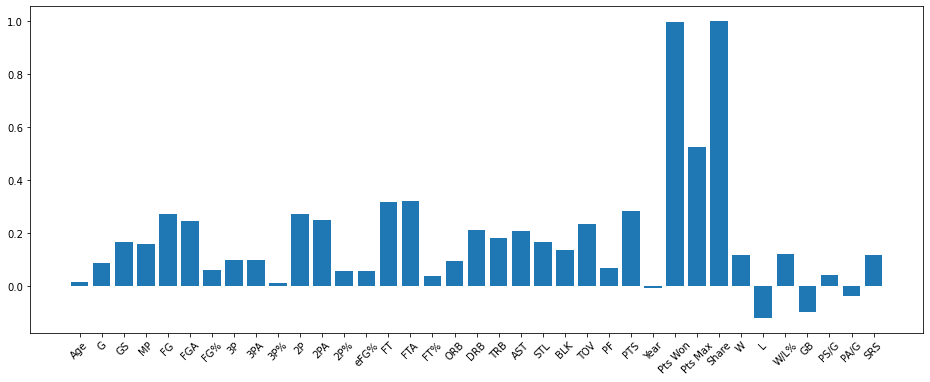

In [54]:
# Let's check what columns have the highest correlatiaon with the Share column

fig, ax = plt.subplots(figsize = (16,6))
plt.bar(x = stats.corr()['Share'].index, height = stats.corr()['Share'])
plt.xticks(rotation = 45)
plt.show()

From the above we can see that aside from sahre, pts won and pts max which all have to do with MVP voting, the most positively correlated stat is FTA. Scoring statistics appear to be very correlated to MVP

## 3. We will now begin the process of preparing and fitting our data to a machine learning algorithm

The target variable (varibale we are trying to predict) in this situation is the 'Share' variable. 

In [55]:
# Read in the data we will be using

stats = pd.read_csv('stats.csv')
stats.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
1,1,Aaron Swinson,SF,24,PHO,9,0,5.7,1.1,2.0,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
2,2,Antonio Lang,SF,22,PHO,12,0,4.4,0.3,0.8,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
3,3,Charles Barkley,PF,31,PHO,68,66,35.0,8.1,16.8,...,1050.0,0.091,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86
4,4,Dan Majerle,SF,29,PHO,82,46,37.7,5.3,12.6,...,0.0,0.000,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86


In [56]:
# Delete 'Unnamed: 0' col

stats.drop(['Unnamed: 0'], axis=1, inplace = True)

In [57]:
# Validate

stats.head(1)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,0.0,0.0,Phoenix Suns,59,23,0.72,0.0,110.6,106.8,3.86


In [58]:
# Check nulls

stats.isnull().sum()

Player          0
Pos             0
Age             0
Tm              0
G               0
GS              0
MP              0
FG              0
FGA             0
FG%            52
3P              0
3PA             0
3P%          1838
2P              0
2PA             0
2P%            93
eFG%           52
FT              0
FTA             0
FT%           490
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Year            0
Pts Won         0
Pts Max         0
Share           0
Team Name       0
W               0
L               0
W/L%            0
GB              0
PS/G            0
PA/G            0
SRS             0
dtype: int64

Since all of the nulls are in percentage columns - we should further inspect to see if these values are blank because the player did not attempt any of that type of shot. For instance if someone attempted 0 three pointers, the percentage column would be 0/0

In [ ]:
# Find the rows where there are null values

stats.loc[stats.isnull().any(axis=1)][['Player','FGA','FG%','3PA','3P%','2PA','2P%','eFG%','FTA','FT%']]

In [60]:
# Since all of these columns are null due to the fact that the player attempted or made 0 of those type of shots resulting in
# the % being 0 - we will use the fillna method and replace all with 0. This TECHNICALLY isn't correct but it most instances if
# you attempted 0 threes or any other type of shot you are likely not in the MVP race (unless you're shaq)

stats.fillna(0, inplace = True)

In [61]:
# Validate

stats.isnull().sum()

Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%          0
3P           0
3PA          0
3P%          0
2P           0
2PA          0
2P%          0
eFG%         0
FT           0
FTA          0
FT%          0
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
Pts Won      0
Pts Max      0
Share        0
Team Name    0
W            0
L            0
W/L%         0
GB           0
PS/G         0
PA/G         0
SRS          0
dtype: int64

In [62]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team Name', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [63]:
# We will now create a dataframe for variables that we willl use to predict our target variable (share)
# In this case, we can only use numeric varibales as many machine learning algo's only accept numeric values
# We will also take out the 'pts won', 'pts max', and 'share' columns as those are what we are trying to predict

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB','W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS']


### We will now create our training and test splits

Since we are going to be trying to predict the MVP for the upcoming year we will train the algo on all previous data aside from the most recent year. The most recent year will be our test set

In [64]:
# training set
train = stats[stats['Year'] < 2022]

In [65]:
# test set
test = stats[stats['Year'] == 2022]

### For our first attempt at modeling we will use a RidgeRegression algorithm. The reasoning for this is as follows:
- We may have some multicollinearity present in our data as some of these columns that we will use as predictor variables likely have some correlation 
- We will have a fair amount of predictors, some of these may prove to be irrelevant or have low predictive power. Ridge Regressors penalize the variables with lower predictive powerand gives more importance to those variables with substantial predictive power

In [66]:
# Import our Ridge regression algorithm

from sklearn.linear_model import Ridge

# Instantiate model
ridge_regressor = Ridge(alpha = .1)

In [67]:
# Fit our model. The x cols will be the 'predictors' that we named before and the y (target) will be 'Share'

ridge_regressor.fit(X = train[predictors], y = train['Share'])

Ridge(alpha=0.1)

In [68]:
# We will now create our first set of predictions

predictions = ridge_regressor.predict(test[predictors])

In [69]:
# Turn our predictions into a dataframe

predictions = pd.DataFrame(predictions, columns = ['Predictions'], index = test.index)
predictions.head()

,Predictions
548,0.031177
549,-0.012817
550,-0.005641
551,0.007401
552,0.005627


In [ ]:
# We can now concatenate the predictors and the test data to compare our predictions to the actual 'Share' column

preds_comparison = pd.concat([test[['Player','Share']], predictions], axis = 1)
preds_comparison

In [71]:
# sort values to make this easier to read

preds_comparison.sort_values(by = 'Share', ascending = False).head(15)

,Player,Share,Predictions
563,Nikola Jokić,0.875,0.134173
737,Joel Embiid,0.706,0.159848
10454,Giannis Antetokounmpo,0.595,0.191636
807,Devin Booker,0.216,0.085008
10288,Luka Dončić,0.146,0.116421
1079,Jayson Tatum,0.043,0.086270
10970,Ja Morant,0.010,0.112911
5914,Stephen Curry,0.004,0.078386
805,Chris Paul,0.002,0.036282
7474,LeBron James,0.001,0.136882


In [72]:
# Let's now sort our df that we just created by share and then assign it a rank

actual = preds_comparison.sort_values("Share", ascending=False)
actual["Rank"] = list(range(1,actual.shape[0]+1))

In [73]:
actual.head()

,Player,Share,Predictions,Rank
563,Nikola Jokić,0.875,0.134173,1
737,Joel Embiid,0.706,0.159848,2
10454,Giannis Antetokounmpo,0.595,0.191636,3
807,Devin Booker,0.216,0.085008,4
10288,Luka Dončić,0.146,0.116421,5


In [74]:
# We also need to create a rank based on our predictions

predicted = preds_comparison.sort_values("Predictions", ascending=False)
predicted['Predicted Rank'] = list(range(1,predicted.shape[0]+1))
predicted.head()

,Player,Share,Predictions,Predicted Rank
10454,Giannis Antetokounmpo,0.595,0.191636,1
737,Joel Embiid,0.706,0.159848,2
7474,LeBron James,0.001,0.136882,3
563,Nikola Jokić,0.875,0.134173,4
5701,Kevin Durant,0.001,0.122060,5


In [75]:
def find_ap(preds_comparison):
    """
    Create a function that creates an average precision scoring metric by scanning through the players who finished top 5
    in MVP voting and see if they were in our top 5 predicted MVPs.
        If they are in our top 5 we will be rewarded. If they were not we will be penalized.
    """
    actual = preds_comparison.sort_values(by = 'Share', ascending = False).head(5)
    predicted = preds_comparison.sort_values(by = 'Predictions', ascending = False)
    scores = [] # this list is where we will append 1 if our predicted player is in the actual top 5 MVPs
    found = 0
    seen = 1
    for index, row in predicted.iterrows(): # Iterate over the rows in the predicted df above
        if row['Player'] in actual['Player'].values: # If the player is found in the actual MVPs df, we will get a point
            found += 1
            scores.append(found/seen)
        seen += 1 # if the player is not found in the actual MVPs we will get penalized
            
    return sum(scores) / len(scores)
        

In [76]:
find_ap(preds_comparison)

0.7602564102564102

### We will now conduct some backtesting to make predictions on years past

In [77]:
# Create a list of the same years we used when scraping the data

years = list(range(1995, 2023))

In [78]:
# We will now loop through our past years and make MVP predictions on those years

aps = []
all_predictions = []
for year in years[5:]: # We will start with the 5th year in our data, any year before that will be our original training set
    train = stats[stats['Year'] < year] # any data before the current iteration will be used as training data
    test = stats[stats['Year'] == year] # all data for that year will be the test data
    ridge_regressor.fit(train[predictors], train['Share']) # Fit our model
    predictions = ridge_regressor.predict(test[predictors])
    predictions = pd.DataFrame(data = predictions, columns = ['Predictions'], index = test.index)
    combination = pd.concat([test[['Player', 'Share']], predictions], axis = 1)
    all_predictions.append(combination)
    aps.append(find_ap(combination)) # Use the function we created earlier to find the average precision

In [79]:
# Get our average precision across all years

sum(aps) / len(aps)

0.6746071493570863

In [80]:
# Create a function to add the ranks to our dataframe. We also want to add a column to show the difference in the rank we
# predicted and the actual rank

def add_rank(combination):
    combination = combination.sort_values(by = 'Share', ascending = False)
    combination['Rank'] = list(range(1, combination.shape[0]+1))
    combination = combination.sort_values(by = 'Predictions', ascending = False)
    combination['Predicted Rank'] = list(range(1, combination.shape[0]+1))
    combination['Rank Difference'] = combination['Rank'] - combination['Predicted Rank']
    return combination

In [ ]:
# Call function on our all_predictions df

add_rank(all_predictions[1])

In [82]:
# Functionize what we did above so we don't have to loop through if we wanted to test a certain year or use a different model

def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats['Year'] < year]
        test = stats[stats['Year'] == year]
        model.fit(train[predictors], train['Share'])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(data = predictions, columns = ['Predictions'], index = test.index)
        combination = pd.concat([test[['Player', 'Share']], predictions], axis = 1)
        combination = add_rank(combination) # add ranking cols
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps)/len(aps), aps, pd.concat(all_predictions) # concat all_predictions since it is currently a list of dataframes

In [83]:
mean_ap, aps, all_predictions = backtest(stats, ridge_regressor, years[5:], predictors)

In [84]:
mean_ap

0.6746071493570863

In [85]:
# Let's now take a look at the most important features for this algorithm

# Turn our regression coefficients and predictor variables into a series and concatenate them
feature_importance = pd.concat([pd.DataFrame(ridge_regressor.coef_, columns = ['Feature Importance']), pd.DataFrame(predictors, columns = ['Predictors'])]
                               , axis = 1 )
# sort by feature importance
feature_importance.sort_values(by = ['Feature Importance'], ascending = False)

,Feature Importance,Predictors
13,0.070096,eFG%
10,0.024940,2P
15,0.013978,FTA
20,0.013911,W/L%
4,0.012456,FG
5,0.006040,FGA
7,0.005303,3P
0,0.000469,Age
21,0.000302,GB
18,0.000165,W


### Let's now do a little bit of feature engineering in hopes of making our algorithm more performant

In [86]:
# Let's turn some of our predictor variables into ratios. For instance we can take look at the amount of points a player scored
# compared to the rest of the league

stats_ratios = stats[['PTS', 'AST', 'STL', 'BLK', '3P', 'Year']].groupby('Year').apply(lambda x: x/x.mean())
stats_ratios.head()

,PTS,AST,STL,BLK,3P,Year
0,1.319103,0.758048,0.991605,0.931570,1.107162,1.0
1,0.317998,0.151610,0.141658,0.000000,0.000000,1.0
2,0.105999,0.050537,0.000000,0.465785,0.000000,1.0
3,2.708873,2.071999,2.266527,1.630247,2.435757,1.0
4,1.837322,2.071999,1.699895,1.164462,5.314379,1.0


In [87]:
# Add these new features to the stats df

stats[['PTS_ratio', 'AST_ratio', 'STL_ratio', 'BLK_ratio', '3P_ratio', 'Year_ratio']] = stats_ratios[['PTS', 'AST', 'STL', 'BLK', '3P', 'Year']]

In [88]:
# We will now add this to list of predictor variables

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB','W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS', 'PTS_ratio', 'AST_ratio', 'STL_ratio', 'BLK_ratio', '3P_ratio']


In [89]:
# Also just realized we accidentally added the year ratio column to our stats df so we will drop that

stats.drop('Year_ratio', axis = 1, inplace = True)

In [90]:
# Ensure our new variables were added as numeric dtypes
stats.dtypes

Player        object
Pos           object
Age            int64
Tm            object
G              int64
GS             int64
MP           float64
FG           float64
FGA          float64
FG%          float64
3P           float64
3PA          float64
3P%          float64
2P           float64
2PA          float64
2P%          float64
eFG%         float64
FT           float64
FTA          float64
FT%          float64
ORB          float64
DRB          float64
TRB          float64
AST          float64
STL          float64
BLK          float64
TOV          float64
PF           float64
PTS          float64
Year           int64
Pts Won      float64
Pts Max      float64
Share        float64
Team Name     object
W              int64
L              int64
W/L%         float64
GB           float64
PS/G         float64
PA/G         float64
SRS          float64
PTS_ratio    float64
AST_ratio    float64
STL_ratio    float64
BLK_ratio    float64
3P_ratio     float64
dtype: object

In [91]:
# all good, we can now refit our model using the new predictor list

mean_ap, aps, all_predictions = backtest(stats, ridge_regressor, years[5:], predictors)

In [92]:
mean_ap

0.7370220655543782

Our model improved from a .67 to a ~.74 average precision score thus meaning we are truly predicting more top 5 MVPs in our top 5

In [93]:
# Let's also now do some feature engineering to factor in positions to the algorithm

# first get unique positions (I'm guessing there should be 5)

stats['Pos'].value_counts()

PF          2674
SG          2654
C           2654
PG          2536
SF          2396
SF-SG         30
SG-SF         30
PG-SG         27
C-PF          27
PF-SF         26
SG-PG         26
PF-C          25
SF-PF         21
SG-PF          4
PG-SF          1
SG-PG-SF       1
SF-C           1
Name: Pos, dtype: int64

In [94]:
# We have more than 5 - for this we are going to drop anything after the dash as I don't think that will improve our model
# performance much and I don't want the model to pick up any unintended pattern

stats['Pos'] = stats['Pos'].apply(lambda x: x.split('-')[-1] if '-'in x else x)

In [95]:
stats['Pos'].value_counts()

PF    2726
SG    2711
C     2680
PG    2562
SF    2454
Name: Pos, dtype: int64

In [96]:
# Now that we only have 5 positions we can encode them pandas get_dummies method

stats_encoded_positions = pd.get_dummies(data = stats[['Pos']], columns = ['Pos'])
stats_encoded_positions.head()

,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0


In [97]:
# We can now concatenate these two to add on these new position variables

stats = pd.concat([stats, stats_encoded_positions], axis = 1)

In [98]:
# For copy and pasting
list(stats_encoded_positions.columns)

['Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']

In [99]:
# Add these new features to our list of predictors 

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB','W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS', 'PTS_ratio', 'AST_ratio', 'STL_ratio', 'BLK_ratio', '3P_ratio','Pos_C', 
        'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG']


In [100]:
mean_ap, aps, all_predictions = backtest(stats, ridge_regressor, years[5:], predictors)

In [101]:
mean_ap

0.7450157753796691

We recieved a slight increase in performance from adding position to the predictor variables. About .01 increase. 

Next we will do the same thing with teams. However, for teams there are 32 unique values. This is too many to encode using get dummies or one hot encoder. So we will want to categorically encode them. 

In [102]:
# We will now get the category code for the teams

stats['New Team'] = stats['Tm'].astype("category").cat.codes

In [103]:
# Validate
print(stats['New Team'].value_counts()), print(stats['Tm'].value_counts())

7     463
17    458
27    456
14    451
12    450
0     449
8     449
1     441
33    441
15    441
9     440
11    440
13    439
31    439
26    439
18    438
5     437
24    434
29    431
28    430
10    428
34    427
19    426
30    425
36    410
16    353
20    286
25    240
32    209
2     182
23    163
3     157
21    143
6     130
4     121
35     88
37     47
22     32
Name: New Team, dtype: int64
CLE    463
MIA    458
PHI    456
LAC    451
HOU    450
ATL    449
DAL    449
BOS    441
TOR    441
LAL    441
DEN    440
GSW    440
IND    439
SAS    439
ORL    439
MIL    438
CHI    437
NYK    434
POR    431
PHO    430
DET    428
UTA    427
MIN    426
SAC    425
WAS    410
MEM    353
NJN    286
OKC    240
SEA    209
BRK    182
NOP    163
CHA    157
NOH    143
CHO    130
CHH    121
VAN     88
WSB     47
NOK     32
Name: Tm, dtype: int64


(None, None)

In [104]:
# We can now add team to our list of predictors

predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB','W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS', 'PTS_ratio', 'AST_ratio', 'STL_ratio', 'BLK_ratio', '3P_ratio','Pos_C', 
        'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'New Team']

### While our teams have been turned into numeric datatypes through encoding, linear regression techniques still have a hard time picking up the categorical relationship that these numbers of the teams ultimately represent. So we may want to look at using a different model if we want to continue to improve our predictive power. 

#### In this case we could use something such as a RandomForest model

In [105]:
# Import our RandomForest & RandomizedSearchCV which we will use to iterate over some parameters to find the best model params

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate our Random Forest Regressor model

rf = RandomForestRegressor(random_state = 24, n_jobs = -1)

In [106]:
# Instantiate RandomizedSearchCV

param_dist = {'n_estimators': [100, 120, 200],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': [None, 5, 10, 20, 50],
             'min_samples_split': [2,4,6,8,10,15,20],
             'min_samples_leaf': [4,8,12,16]}

random_search_rfr = RandomizedSearchCV(estimator = rf,
                                      param_distributions = param_dist,
                                      n_iter = 5,
                                      cv = 4,
                                      scoring = 'neg_mean_squared_error')

In [107]:
# Fit the model using the for loop we used for our backtest function

aps = []
all_predictions = []
for year in years[5:]: # We will start with the 5th year in our data, any year before that will be our original training set
    train = stats[stats['Year'] < year] # any data before the current iteration will be used as training data
    test = stats[stats['Year'] == year] # all data for that year will be the test data
    random_search_rfr.fit(train[predictors], train['Share']) # Fit our model
    predictions = random_search_rfr.predict(test[predictors])
    predictions = pd.DataFrame(data = predictions, columns = ['Predictions'], index = test.index)
    combination = pd.concat([test[['Player', 'Share']], predictions], axis = 1)
    all_predictions.append(combination)
    aps.append(find_ap(combination)) # Use the function we created earlier to find the average precision

In [108]:
# Get the mean aps
sum(aps) / len(aps)

0.7492187272574794

In [109]:
# Find the best params for our model
random_search_rfr.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 50}

### From the above we can see our model performed very similarly to the Ridge Regression. Taking into account how much computing power and extra time it takes for a RandomForest to run, we may want to consider sticking with the ridge regression model.